In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Part 1
df_population = pd.read_csv('Population Data.csv')
df_temperature = pd.read_csv('Temperature Data.csv')


In [4]:
#df_population.tail(60)

In [5]:
sorted(df_population.City.unique())

['Abilene',
 'Akron',
 'Albuquerque',
 'Alexandria',
 'Allentown',
 'Amarillo',
 'Anaheim',
 'Anchorage',
 'Ann Arbor',
 'Antioch',
 'Arlington',
 'Arvada',
 'Athens',
 'Atlanta',
 'Augusta',
 'Aurora',
 'Austin',
 'Bakersfield',
 'Baltimore',
 'Baton Rouge',
 'Beaumont',
 'Bellevue',
 'Berkeley',
 'Billings',
 'Birmingham',
 'Boise',
 'Boston',
 'Bridgeport',
 'Broken Arrow',
 'Brownsville',
 'Buffalo',
 'Burbank',
 'Cambridge',
 'Cape Coral',
 'Carlsbad',
 'Carrollton',
 'Cary',
 'Cedar Rapids',
 'Centennial',
 'Chandler',
 'Charleston',
 'Charlotte',
 'Chattanooga',
 'Chesapeake',
 'Chicago',
 'Chula Vista',
 'Cincinnati',
 'Clarksville',
 'Clearwater',
 'Cleveland',
 'Colorado Springs',
 'Columbia',
 'Columbus',
 'Concord',
 'Coral Springs',
 'Corona',
 'Corpus Christi',
 'Costa Mesa',
 'Dallas',
 'Daly City',
 'Davenport',
 'Dayton',
 'Denton',
 'Denver',
 'Des Moines',
 'Detroit',
 'Downey',
 'Durham',
 'El Cajon',
 'El Monte',
 'El Paso',
 'Elgin',
 'Elizabeth',
 'Elk Grove',
 '

In [6]:
df_population[df_population.State == 'New York']

,City,State,population,Lon,Lat
7,Buffalo,New York,261025,-78.8597,42.8925
8,Rochester,New York,210855,-77.6169,43.1699
9,Syracuse,New York,145151,-76.1436,43.0410
10,New York,New York,8244910,-73.9385,40.6643
11,Yonkers,New York,197399,-73.8674,40.9459


In [7]:
df_temperature

,name,country_name,country_code,continent,station_code,location_date,temp_mean_c,temp_min_c,temp_max_c
0,Atlanta,UnitedStates,USA,North America,KATL,4/20/2021,17.491667,12.2,23.3
1,Windsor Locks,UnitedStates,USA,North America,KBDL,4/20/2021,13.887500,3.9,22.2
2,Nashville,UnitedStates,USA,North America,KBNA,4/20/2021,15.175000,6.7,23.3
3,Boise,UnitedStates,USA,North America,KBOI,4/20/2021,9.329167,1.7,15.6
4,Boston,UnitedStates,USA,North America,KBOS,4/20/2021,16.716667,10.0,23.9
...,...,...,...,...,...,...,...,...,...
89214,Sacramento/Execu,UnitedStates,USA,North America,KSAC,1/1/2015,3.500000,-1.7,10.6
89215,Portland,UnitedStates,USA,North America,KPWM,1/1/2015,-3.454167,-7.8,-0.6
89216,Raleigh/Durham,UnitedStates,USA,North America,KRDU,1/1/2015,3.291667,-4.4,10.6
89217,Pittsburgh,UnitedStates,USA,North America,KPIT,1/1/2015,-2.570833,-6.7,1.7


In [8]:
# Lookup name to get population (Bit slow, should flip lookup)
name_pop = {}
name_pop['Unknown'] = 0
unknown = []
for name in df_temperature.name.values:
    # Lookup both names
    split_name = name.split('/')
    primary_name = split_name[0]
    if primary_name in df_population.City.values:
        name_pop[name] = df_population[df_population['City'] == primary_name].population.values[0]
    elif len(split_name) > 1:
        secondary_name = split_name[1]
        if split_name[1] in df_population.City.values:
            name_pop[name] = df_population[df_population['City'] == secondary_name].population.values[0]
    else:
        name_pop['Unknown'] += 1
        unknown.append(split_name)

In [9]:
# 38 cities
df_temperature.name.unique()

array(['Atlanta', 'Windsor Locks', 'Nashville', 'Boise', 'Boston',
       'Buffalo', 'Burbank', 'Baltimore', 'Columbus', 'Los Angeles',
       'Covington', 'Washington', 'Denver', 'Dallas', 'Detroit/Wayne',
       'Fresno', 'Spokane', 'Wash DC/Dulles', 'Houston', 'Las Vegas',
       'NYC/LaGuardia', 'Little Rock', 'Memphis', 'Minneapolis',
       'New Orleans', "Chicago O'Hare", 'Portland', 'Philadelphia',
       'Phoenix/Sky HRBR', 'Pittsburgh', 'Raleigh/Durham', 'Richmond',
       'Sacramento/Execu', 'Seattle', 'San Francisco', 'Salt Lake City',
       'St Louis/Lambert', 'Albany'], dtype=object)

In [10]:
df_temperature.name.unique()

array(['Atlanta', 'Windsor Locks', 'Nashville', 'Boise', 'Boston',
       'Buffalo', 'Burbank', 'Baltimore', 'Columbus', 'Los Angeles',
       'Covington', 'Washington', 'Denver', 'Dallas', 'Detroit/Wayne',
       'Fresno', 'Spokane', 'Wash DC/Dulles', 'Houston', 'Las Vegas',
       'NYC/LaGuardia', 'Little Rock', 'Memphis', 'Minneapolis',
       'New Orleans', "Chicago O'Hare", 'Portland', 'Philadelphia',
       'Phoenix/Sky HRBR', 'Pittsburgh', 'Raleigh/Durham', 'Richmond',
       'Sacramento/Execu', 'Seattle', 'San Francisco', 'Salt Lake City',
       'St Louis/Lambert', 'Albany'], dtype=object)

In [11]:
# Missing populations in the dataset:
np.unique(unknown, return_counts=True)

(array(['Albany', "Chicago O'Hare", 'Covington', 'Windsor Locks'],
       dtype='<U14'),
 array([2287, 2288, 2287, 2288]))

In [12]:
# Missing populations in the dataset:
missing_cities = ['Albany', "Chicago O'Hare", 'Covington', 'Windsor Locks']

In [18]:
df_population[df_population['City'] == 'Chicago']

,City,State,population,Lon,Lat
150,Chicago,Illinois,2707120,-87.6818,41.8376


In [22]:
df_population[df_population['City'] == 'Albany']

,City,State,population,Lon,Lat


In [13]:
df_temperature['population'] = df_temperature.name.apply(lambda x: name_pop[x] if x in name_pop else float('nan'))

In [17]:
df_temperature[df_temperature['station_code'] == 'KBDL']

,name,country_name,country_code,continent,station_code,location_date,temp_mean_c,temp_min_c,temp_max_c,population
1,Windsor Locks,UnitedStates,USA,North America,KBDL,4/20/2021,13.887500,3.9,22.2,NaN
74,Windsor Locks,UnitedStates,USA,North America,KBDL,4/19/2021,12.633333,6.7,18.3,NaN
79,Windsor Locks,UnitedStates,USA,North America,KBDL,4/18/2021,11.487500,5.6,17.8,NaN
152,Windsor Locks,UnitedStates,USA,North America,KBDL,4/17/2021,7.737500,5.0,11.1,NaN
157,Windsor Locks,UnitedStates,USA,North America,KBDL,4/16/2021,3.883333,1.7,5.6,NaN
...,...,...,...,...,...,...,...,...,...,...
89026,Windsor Locks,UnitedStates,USA,North America,KBDL,1/5/2015,-1.429167,-9.4,6.1,NaN
89099,Windsor Locks,UnitedStates,USA,North America,KBDL,1/4/2015,1.754167,-1.1,8.9,NaN
89104,Windsor Locks,UnitedStates,USA,North America,KBDL,1/3/2015,-2.258333,-5.0,1.1,NaN
89177,Windsor Locks,UnitedStates,USA,North America,KBDL,1/2/2015,0.466667,-3.3,3.3,NaN


In [69]:
# Group by dates, to the total population, grouped by location date


In [78]:
df_temperature.groupby('location_date').sum().population.value_counts()

22907360.0    2279
1469471.0       14
15725414.0       1
22646335.0       1
22114193.0       1
19344164.0       1
21694047.0       1
21538899.0       1
21904635.0       1
20716521.0       1
22287392.0       1
Name: population, dtype: int64

In [121]:
def fix_date(x):
    """Fix dates which don't have leading zeros."""
    components = x.split("/")
    components = [comp if len(comp) >= 2 else f"{int(comp):02d}" for comp in components]
    return "/".join(components)

In [120]:
fix_dates(dates[-1])

'09/09/2020'

In [127]:
import datetime as datetime
df_temperature['datetime'] = df_temperature['location_date'].apply(lambda x: datetime.datetime.strptime(x, "%m/%d/%Y"))

In [130]:
sorted(df_temperature.datetime.values)[-1]

numpy.datetime64('2021-04-20T00:00:00.000000000')

In [131]:
# Date range 01/01/2015 - 04/20/2021 (2302 days)
dates = sorted(df_temperature.datetime.unique())
print(dates[0], dates[-1])

2015-01-01T00:00:00.000000000 2021-04-20T00:00:00.000000000


In [132]:
# We have at least one value for every date. Let's plot the summed population by date
len(dates)

2302

In [136]:
datetime_totalpop = df_temperature.groupby('datetime').sum().population

<AxesSubplot:xlabel='year', ylabel='value'>

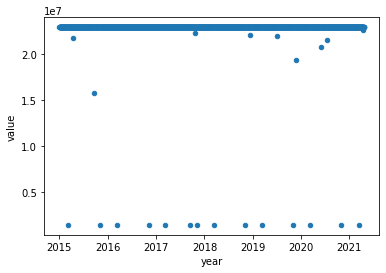

In [145]:
#

datetime_totalpop = df_temperature.groupby('datetime').sum().population

#Plot total populations of operational station cities. 
df_f = datetime_totalpop.to_frame()
df_f.reset_index(inplace=True)
df_f.columns = ['year','value']

df_f.plot(kind = 'scatter', x='year', y='value')

In [189]:
def population_weighted_temperature(df):
    """ Population weighted mean is
    (pop_1*temp_1 + ... + pop_n*temp_n)/(pop_1 +...+ pop_n)"""
    datetime_totalpop = df.groupby('datetime').sum().population
    df['temp_pop_prod'] = df.apply(lambda x: x['temp_mean_c']*x['population'], axis=1)

    population_weighted_temps = (df.groupby('datetime').sum().temp_pop_prod)/datetime_totalpop
    return population_weighted_temps

In [188]:
population_weighted_temperature(df_temperature)

datetime
2015-01-01     2.661411
2015-01-02     4.620273
2015-01-03     5.667667
2015-01-04     6.776247
2015-01-05     5.184007
                ...    
2021-04-16    13.532090
2021-04-17    13.873307
2021-04-18    15.708516
2021-04-19    15.470641
2021-04-20    15.227331
Length: 2302, dtype: float64

In [184]:
population_weighted_temps

datetime
2015-01-01     2.661411
2015-01-02     4.620273
2015-01-03     5.667667
2015-01-04     6.776247
2015-01-05     5.184007
                ...    
2021-04-16    13.532090
2021-04-17    13.873307
2021-04-18    15.708516
2021-04-19    15.470641
2021-04-20    15.227331
Length: 2302, dtype: float64

In [35]:
def plot_series_scatter(series):
    #Plot weighted temperature
    df_plot = series.to_frame()
    df_plot.reset_index(inplace=True)
    df_plot.columns = ['year','y']

    df_plot.plot(kind = 'scatter', x='year', y='y')
    
def plot_series_array_scatter(series_array):
    #Plot a list of timeseries, each in a different color

    fig, ax = plt.subplots()
    colors = ['blue', 'green', 'red', 'cyan', 'magenta', 
              'yellow', 'black', 'white']
    for i,series in enumerate(series_array):
        df_plot = series.to_frame()
        df_plot.reset_index(inplace=True)
        df_plot.columns = ['year','y']
        ax.scatter(df_plot.year, df_plot.y,  color=colors[i%(len(colors))])
        #df_plot.plot(kind = 'line', x='year', y='y', color=colors[i%(len(colors))], ax=ax)

datetime
2015-01-01     2.661411
2015-01-02     4.620273
2015-01-03     5.667667
2015-01-04     6.776247
2015-01-05     5.184007
                ...    
2021-04-16    13.532090
2021-04-17    13.873307
2021-04-18    15.708516
2021-04-19    15.470641
2021-04-20    15.227331
Length: 2302, dtype: float64

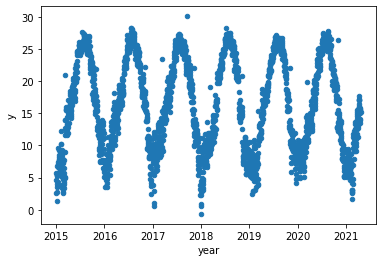

In [212]:
#Plot weighted temperature
plot_series_scatter(population_weighted_temps)
population_weighted_temps

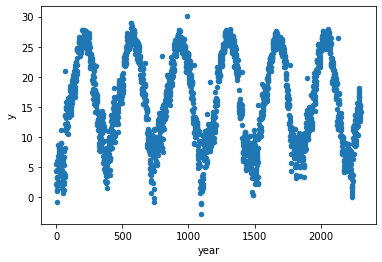

In [37]:
plot_series_scatter(df_daily['temp_mean'])


In [40]:
len(df_daily.date.unique())

2302

In [41]:
# Temperature by station with populations
stations = df_temperature[~np.isnan(df_temperature['population'])].name.unique()

#Plot per station
series_array = []
for station in stations[0:1]:
    df_station = df_temperature[df_temperature['name'] == station].copy()
    series_array.append(population_weighted_temperature(df_station))
    
plot_series_array_scatter(series_array)

NameError: name 'population_weighted_temperature' is not defined

In [23]:
# Import transformed data
df_daily = pd.read_csv('temperature_of_location_date.csv')

In [30]:
df_daily['daily_temps'].iloc[0]

'(2.143194204652545, -2.0310582522610594, 6.328438952852305)'

In [31]:
import ast
ast.literal_eval(df_daily['daily_temps'].iloc[0])

(2.143194204652545, -2.0310582522610594, 6.328438952852305)

In [32]:
df_daily['temp_mean'] = df_daily['daily_temps'].apply(lambda x: ast.literal_eval(x)[0])

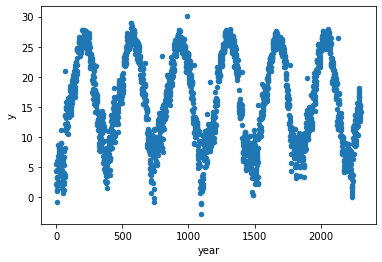

In [36]:
plot_series_scatter(df_daily['temp_mean'])


In [220]:
stations[:4]

array(['Atlanta', 'Nashville', 'Boise', 'Boston'], dtype=object)

0        False
1         True
2        False
3        False
4        False
         ...  
89214    False
89215    False
89216    False
89217    False
89218    False
Name: population, Length: 89219, dtype: bool

In [164]:
datetime_totalpop

datetime
2015-01-01    22907360.0
2015-01-02    22907360.0
2015-01-03    22907360.0
2015-01-04    22907360.0
2015-01-05    22907360.0
                 ...    
2021-04-16    22907360.0
2021-04-17    22907360.0
2021-04-18    22907360.0
2021-04-19    22907360.0
2021-04-20    22907360.0
Name: population, Length: 2302, dtype: float64

In [165]:
(df_temperature.groupby('datetime').sum().temp_pop_prod)

datetime
2015-01-01    6.096591e+07
2015-01-02    1.058383e+08
2015-01-03    1.298313e+08
2015-01-04    1.552259e+08
2015-01-05    1.187519e+08
                  ...     
2021-04-16    3.099845e+08
2021-04-17    3.178008e+08
2021-04-18    3.598406e+08
2021-04-19    3.543915e+08
2021-04-20    3.488180e+08
Name: temp_pop_prod, Length: 2302, dtype: float64

In [161]:
df_temperature[df_temperature['datetime'] == dates[0]].temp_mean_c.mean()

0.1863247897435896

In [93]:
# Available dates: 2302
print(len(dates))

2302


In [74]:
pop_series.index

Float64Index([         715855.0,         1469471.0, 737139.7666666667,
              742720.6551724138,          723134.9,          690863.0,
              714362.7931034482, 718948.1290322581,          730154.5,
              604823.6153846154, 730526.9354838709],
             dtype='float64')

7.158550e+05    2279
1.469471e+06      14
7.371398e+05       1
7.427207e+05       1
7.231349e+05       1
6.908630e+05       1
7.143628e+05       1
7.189481e+05       1
7.301545e+05       1
6.048236e+05       1
7.305269e+05       1
Name: population, dtype: int64

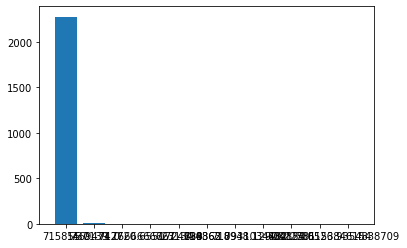

In [76]:
# Population average by date (with available data)
fig, ax = plt.subplots()
ax.bar(pop_series.index.values.astype(str), pop_series.values)
pop_series

What this means is for 99% of the days, the stations which are operational and have known population values have an average population of 715,855 people. Of that last 1%, only 0.6% is significantly different (double).

In [ ]:
# Does it give reasonable data on those days?
# 

In [59]:
len(df_temperature.date.unique)

AttributeError: 'DataFrame' object has no attribute 'date'

In [44]:
# 32 captured
len(name_pop)

32

In [35]:
name_pop

{'Unknown': 9150,
 'Atlanta': 432427,
 'Nashville': 609644,
 'Boise': 210145,
 'Boston': 625087,
 'Buffalo': 261025,
 'Burbank': 104092,
 'Baltimore': 619493,
 'Columbus': 797434,
 'Los Angeles': 3819702,
 'Washington': 617996,
 'Denver': 619968,
 'Dallas': 1223229,
 'Detroit': 706585,
 'Fresno': 501362,
 'Spokane': 210103,
 'Houston': 2145146,
 'Las Vegas': 589317,
 'Little Rock': 195314,
 'Memphis': 652050,
 'Minneapolis': 387753,
 'New Orleans': 360740,
 'Portland': 593820,
 'Philadelphia': 1536471,
 'Phoenix': 1469471,
 'Pittsburgh': 307484,
 'Raleigh': 416468,
 'Richmond': 205533,
 'Sacramento': 472178,
 'Seattle': 620778,
 'San Francisco': 812826,
 'Salt Lake City': 189899}

In [33]:
len(name_pop)

32

In [30]:
station_counts = df_temperature.name.value_counts()

In [32]:
len(station_counts)

38

In [37]:
station_counts

Portland            4575
Phoenix/Sky HRBR    2302
Memphis             2288
Las Vegas           2288
NYC/LaGuardia       2288
Pittsburgh          2288
Little Rock         2288
Windsor Locks       2288
Nashville           2288
Sacramento/Execu    2288
Richmond            2288
Chicago O'Hare      2288
St Louis/Lambert    2288
Boise               2288
Raleigh/Durham      2288
Philadelphia        2288
Boston              2288
Seattle             2288
Covington           2287
San Francisco       2287
Houston             2287
Salt Lake City      2287
Albany              2287
Atlanta             2287
Los Angeles         2287
Fresno              2287
Minneapolis         2287
Wash DC/Dulles      2287
Washington          2287
Columbus            2287
Burbank             2287
Spokane             2287
Buffalo             2286
Baltimore           2286
Dallas              2286
New Orleans         2286
Denver              2286
Detroit/Wayne       2286
Name: name, dtype: int64

In [ ]:
# Population-weighted daily temperature time series back to beginning of 
# 2015 using only this data


# Note: some data may be missing (weather station not operational or day not available)

In [14]:
len(df_temperature.location_date.value_counts())

2302

In [15]:
df_temperature.location_date.value_counts()

9/26/2015     39
9/9/2016      39
8/26/2016     39
10/14/2018    39
5/31/2018     39
              ..
11/6/2016      1
3/11/2018      1
3/14/2021      1
9/16/2017      1
3/8/2015       1
Name: location_date, Length: 2302, dtype: int64

In [ ]:
# Write a program to generate the timeseries, while handling missing data
# Must give a reasonable daily value even when data is missing